## Demo of Astronomical Interactive Data Analysis Techniques using IPython/Jupyter Notebooks and Ginga

This notebook shows examples of using an interactive Ginga viewer running in an HTML5 canvas with an IPython Notebook.  You do not need a special widget set to run this, just an HTML5 compliant browser.

See NOTES at end for more info installation/requirements.

If you want to play with this stuff, you can get the notebook [here](https://github.com/ejeschke/ginga/blob/master/ginga/examples/ipython-notebook/ginga_ipython_demo.ipynb)

There are two example FITS files used in this document.
You can get them [here](https://docs.google.com/file/d/0B6XTrKRuqwwKclUwTmxJbGlBTlU/edit?usp=sharing)
and [here](https://docs.google.com/file/d/0B6XTrKRuqwwKLXNtMjJUTmZBZ3M/edit?usp=sharing).
Put them in the same directory where you downloaded the notebook.

In [8]:
# Requirements:
from ginga.version import version
version

# Get ginga from github (https://github.com/ejeschke/ginga) or
#   pypi (https://pypi.python.org/pypi/ginga)
# Ginga documentation at: http://ginga.readthedocs.io/en/latest/

'2.5.20160322122203'

In [2]:
# setup
from ginga.web.pgw import ipg
# Set this to True if you have a non-buggy python OpenCv bindings--it greatly speeds up some operations
use_opencv = False

server = ipg.make_server(host='localhost', port=9914, use_opencv=use_opencv)

In [3]:
# Start viewer server
# IMPORTANT: if running in an IPython/Jupyter notebook, use the no_ioloop=True option
server.start(no_ioloop=True)

In [4]:
# Get a viewer
# This will get a handle to the viewer v1 = server.get_viewer('v1')
v1 = server.get_viewer('v1')

In [5]:
# where is my viewer
v1.url

'http://localhost:9914/app?id=v1'

In [7]:
# open the viewer in a new window
v1.open()

*NOTE*: if you don't have the `webbrowser` module, *open the link that was printed in the cell above in a new window* to get the viewer.  

You can open as many of these viewers as you want--just keep a handle to it and use a different name for each unique one.

Keyboard/mouse bindings in the viewer window: http://ginga.readthedocs.io/en/latest/quickref.html

You will want to check the box that says "I'm using a trackpad" if you are--it makes zooming much smoother

In [9]:
# Load an image into the viewer
# (change the path to where you downloaded the sample images, or use your own)
v1.load('camera.fits')

In [10]:
# Example of embedding a viewer
v1.embed(height=650)

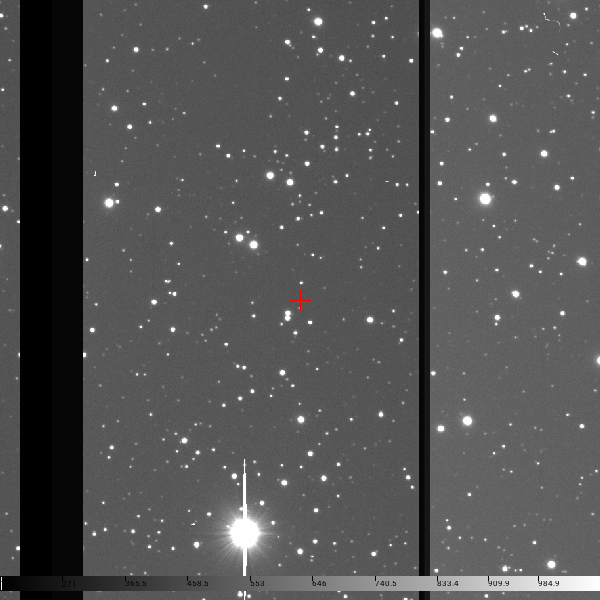

In [12]:
# capture the screen
v1.show()


In [13]:
# Let's get the pan position we just set
dx, dy = v1.get_pan()
dx, dy

(942.8148383613562, 2501.2467844286034)

In [14]:
# Getting values from the FITS header is also easy
img = v1.get_image()
hdr =img.get_header()
hdr['OBJECT']

'M27'

In [15]:
# What are the coordinates of the pan position?
# This uses astropy.wcs under the hood if you have it installed
img.pixtoradec(dx, dy)

(299.66935778004364, 22.829979334833414)

In [16]:
# Set cut level algorithm to use
v1.set_autocut_params('zscale', contrast=0.25)
# Auto cut levels on the image
v1.auto_levels()

In [17]:
# Let's do an example of the two-way interactivity
# First, let's add a drawing canvas
canvas = v1.add_canvas()

In [18]:
# delete all objects on the canvas
canvas.delete_all_objects()
# set the drawing parameters
canvas.set_drawtype('point', color='black')

Now, in the Ginga window, draw a point using the right mouse button (if you only have one mouse button (e.g. Mac) press and release spacebar, then click and drag)

In [20]:
# get the pixel coordinates of the point we just drew
p = canvas.objects[0]
p.x, p.y

(900.1305789593886, 2667.4105085291203)

In [21]:
# Get the RA/DEC in degrees of the point
img.pixtoradec(p.x, p.y)

(299.6719396007278, 22.839306635754866)

In [22]:
# Get RA/DEC in H M S sign D M S
img.pixtoradec(p.x, p.y, format='hms')

(19, 58, 41.26550417467115, 1, 22, 50, 21.50388871751784)

In [23]:
# Get RA/DEC in classical string notation
img.pixtoradec(p.x, p.y, format='str')

('19:58:41.266', '+22:50:21.50')

In [24]:
# Verify we have a valid coordinate system defined
img.wcs.coordsys

'fk5'

In [25]:
# Get viewer model holding data
image = v1.get_image()
image.get_minmax()

(170, 65535)

In [26]:
# get viewer data
data_np = image.get_data()
import numpy as np
np.mean(data_np)

585.40388180946195

In [27]:
# Set viewer cut levels
v1.cut_levels(170, 2000)

In [28]:
# set a color map on the viewer 
v1.set_color_map('smooth')

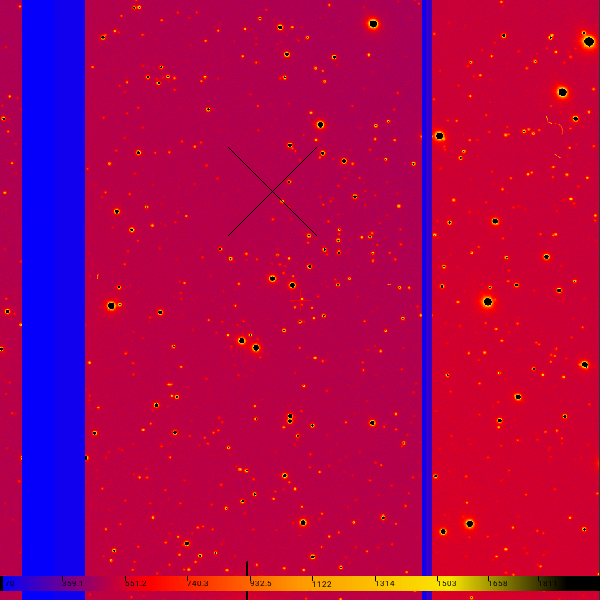

In [29]:
# Image will appear in this output
v1.show()

In [30]:
# Set color distribution algorithm
# choices: linear, log, power, sqrt, squared, asinh, sinh, histeq, 
v1.set_color_algorithm('linear')

In [31]:
# Example of setting another draw type.
canvas.delete_all_objects()
canvas.set_drawtype('rectangle')

Now right-drag to draw a *small* rectangle in the Ginga image.
Remember: On a single button pointing device, press and release spacebar, then click and drag.

Try to include some objects. 


In [32]:
# Find approximate bright peaks in a sub-area
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

img = v1.get_image()
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)
peaks[:20]

[(140.0, 1.0),
 (295.0, 1.0),
 (70.0, 9.0),
 (46.0, 14.0),
 (165.0, 14.0),
 (171.0, 14.0),
 (79.0, 16.0),
 (263.0, 16.0),
 (25.0, 17.0),
 (185.0, 20.0),
 (201.0, 24.0),
 (183.0, 36.0),
 (156.0, 37.0),
 (66.0, 39.0),
 (168.0, 40.0),
 (168.0, 49.0),
 (192.0, 53.0),
 (153.0, 70.0),
 (222.0, 71.0),
 (71.0, 72.0)]

In [33]:
# evaluate peaks to get FWHM, center of each peak, etc.
objs = iq.evaluate_peaks(peaks, data)
# how many did we find with standard thresholding, etc.
# see params for find_bright_peaks() and evaluate_peaks() for details
len(objs)

/Users/eric/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


75

In [34]:
# example of what is returned
o1 = objs[0]
o1

{'brightness': 2255.6793418009784, 'objy': 1.5997335155264143, 'objx': 140.13223483828443, 'elipse': 0.6788366415905084, 'pos': 0.9389201729497025, 'background': 475.0, 'y': 1, 'x': 140, 'fwhm_y': 1.9834192302685998, 'fwhm_x': 2.9217916487558266, 'fwhm': 2.4970801230375623, 'fwhm_radius': 15, 'skylevel': 538.75}

In [35]:
# pixel coords are for cutout, so add back in origin of cutout
#  to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1+o1.objx, y1+o1.objy)

(299.6708543337228, 22.82741981514727)

In [36]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1+obj.objx, y1+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
v1.set_pan((x1+x2)/2, (y1+y2)/2)
v1.scale_to(0.75, 0.75)

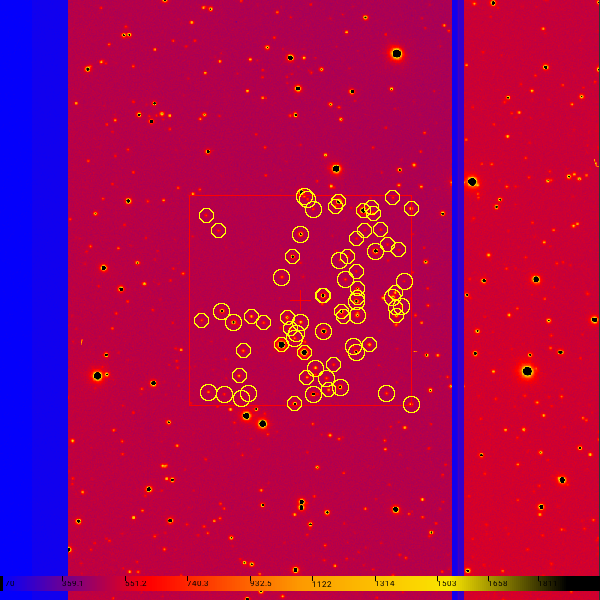

In [37]:
v1.show()

How about some plots...?

In [38]:
# Load an image from a spectrograph at least 1000x1000 (e.g. spectra.fits)
v1.load('spectra.fits')

In [39]:
# swap XY, flip Y, change colormap back to "ramp"
v1.set_color_map('gray')
v1.transform(False, True, True)
v1.auto_levels()

In [42]:
# Programmatically add a line along the figure at designated coordinates
canvas.delete_all_objects()
Line = canvas.get_draw_class('line')
l1 = Line(0, 512, 250, 512)
tag = canvas.add(l1)

In [43]:
# Set the pan position and zoom to 1:1.  Show what we did.
v1.set_pan(125, 512)
v1.scale_to(1.0, 1.0)

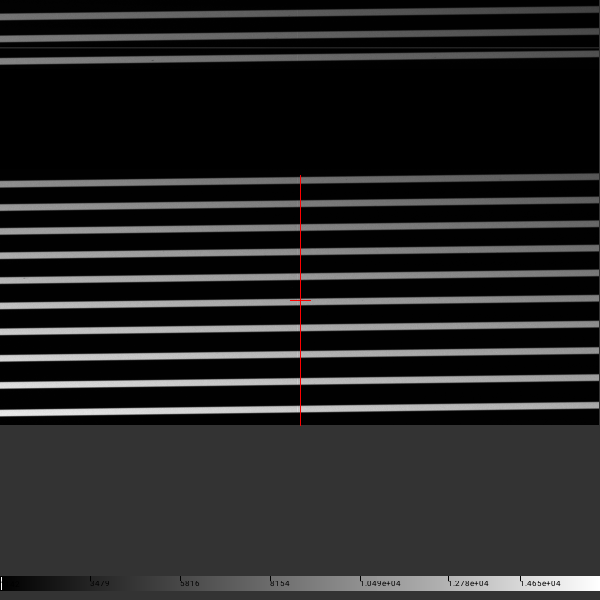

In [44]:
v1.show()

In [45]:
# Get the pixel values along this line
img = v1.get_image()
values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
values[:10]

[1231.0,
 1237.0,
 1220.0,
 1233.0,
 1235.0,
 1229.0,
 1229.0,
 1234.0,
 1228.0,
 1237.0]

/Users/eric/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


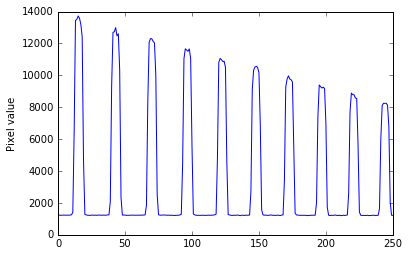

In [46]:
# Plot the 'cuts'
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.cla()
plt.plot(values)
plt.ylabel('Pixel value')

plt.show()

In [47]:
# Plot the cuts that we will draw interactively
canvas.delete_all_objects()
canvas.set_drawtype('line')

Now draw a line through the image (remember to use right mouse btn or else press space bar first)

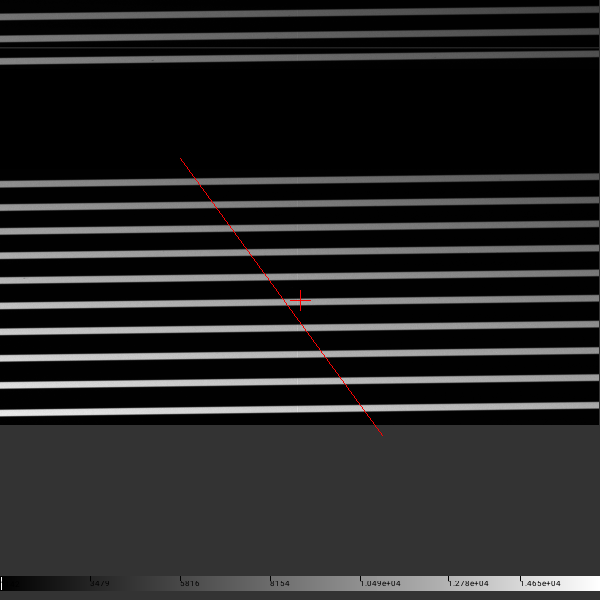

In [48]:
# show our line we drew
v1.show()

In [49]:
def getplot(v1):
    l1 = canvas.objects[0]
    img = v1.get_image()
    values = img.get_pixels_on_line(l1.x1, l1.y1, l1.x2, l1.y2)
    plt.cla()
    
    plt.plot(values)
    plt.ylabel('Pixel value')
    plt.show()

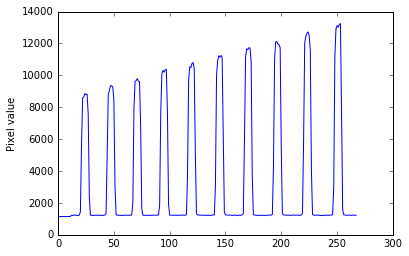

In [50]:
getplot(v1)

## Other ways of loading data

In [52]:
# make some random data in a numpy array
import numpy as np
import random
data_np = np.random.rand(512, 512)

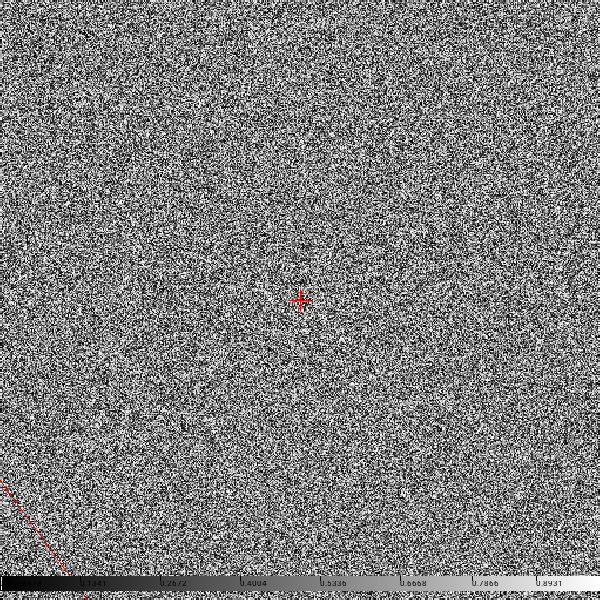

In [54]:
# example of loading numpy data directly to the viewer
v1.load_data(data_np)
v1.show()

In [14]:
# example of loading astropy.io.fit HDUs
from astropy.io import fits
fits_f = fits.open('camera.fits', 'readonly')
hdu = fits_f[0]
v1.load_hdu(hdu)

Th-th-th-that's all folks!

## Requirements

Needed packages for this notebook:

- [`ginga`](https://github.com/ejeschke/ginga), jupyter/ipython w/notebook feature
- typical scientific python reqs: `numpy`, `scipy`, `astropy`
- for drawing, you will need either PIL/pillow, OpenCv or the [`aggdraw` module](https://github.com/ejeschke/aggdraw) module (python 2 only).  PIL is included in anaconda, so is usually all you need.
- optional, but highly recommended: `webbrowser`, OpenCv

Latest Ginga documentation, including detailed installation instructions, can be found [here](http://ginga.readthedocs.io/en/latest/).